# Visualize Results of Matching Runs from CORP Initial Runs

## Import in data from runs

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('match_runs.csv')

In [3]:
data_df['settings_file'].unique()

array(['settings_unk', 'dedupe_extension/settings_0', 'settings_bad',
       'dedupe_extension/settings_2', 'dedupe_extension/settings_3',
       'dedupe_extension/settings_4', 'dedupe_extension/settings_1'],
      dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
data_df['settings_num'] = encoder.fit_transform(data_df['settings_file'])

In [6]:
data_df

,run_id,completed,predicates,total_clusters,avg_cluster_size,biggest_cluster_size,biggest_cluster,total_donors,donor_type,total_run_time,donor_cluster_ratio,settings_file,settings_num
0,2,2020-11-26 10:44:40.886474,"(SimplePredicate: (sameFiveCharStartPredicate,...",1928,2.973548,51,unitemized:66057,15870,CORP,26.358974,8.231328,settings_unk,6
1,3,2020-11-26 10:52:05.644924,"(SimplePredicate: (sameFiveCharStartPredicate,...",1928,2.973548,51,unitemized:66057,15870,CORP,27.552221,8.231328,settings_unk,6
2,4,2020-11-26 11:04:51.839398,"(SimplePredicate: (sameFiveCharStartPredicate,...",1928,2.973548,51,unitemized:66057,15870,CORP,26.052074,8.231328,settings_unk,6
3,5,2020-11-26 11:05:23.672557,"(SimplePredicate: (sameFiveCharStartPredicate,...",1928,2.973548,51,unitemized:66057,15870,CORP,25.683172,8.231328,settings_unk,6
4,6,2020-11-26 11:17:23.47321,"(ExistsPredicate: (Exists, zip), SimplePredica...",1955,3.322762,42,unitemized:80898,15870,CORP,557.389749,8.117647,dedupe_extension/settings_0,0
5,7,2020-11-26 12:56:57.027681,"(SimplePredicate: (commonFourGram, name), Simp...",1531,2.938602,43,unitemized:80898,15870,CORP,27.494379,10.365774,settings_bad,5
6,8,2020-11-26 13:30:37.185452,"(SimplePredicate: (doubleMetaphone, state), Si...",1973,3.358338,53,friends of assemblyman tedisco:71158,15870,CORP,1902.834142,8.043588,dedupe_extension/settings_2,2
7,9,2020-11-26 14:10:48.821022,"(ExistsPredicate: (Exists, city), SimplePredic...",4209,3.634593,81,unitemized:152684,30498,CORP,1586.045412,7.245902,dedupe_extension/settings_3,3
8,10,2020-11-27 11:04:01.639993,"(ExistsPredicate: (Exists, city), SimplePredic...",10272,4.105530,184,unitemized,70400,CORP,NaN,6.853583,dedupe_extension/settings_3,3
9,11,2020-11-27 12:52:09.703191,(SimplePredicate: (sameSevenCharStartPredicate...,4152,3.611513,114,unitemized unitemized:124639,30526,CORP,2677.995577,7.352119,dedupe_extension/settings_4,4


In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [14]:
data = {'size': data_df['total_donors'].values, 
       'cluster_ratio': data_df['donor_cluster_ratio'].values,
       'settings': data_df['settings_file'].values}

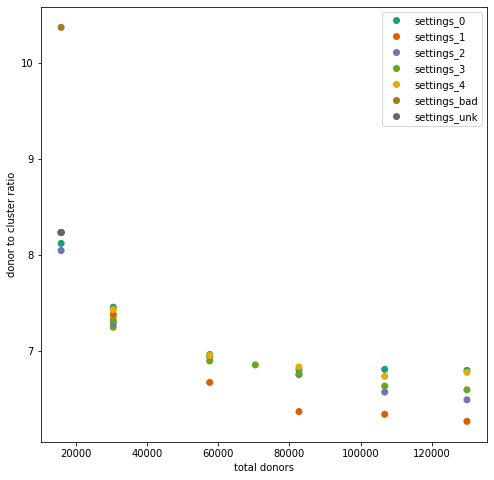

In [24]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['donor_cluster_ratio'].values, c=data_df['settings_num'].values, cmap='Dark2')
settings = ['settings_0','settings_1','settings_2','settings_3','settings_4','settings_bad','settings_unk']
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

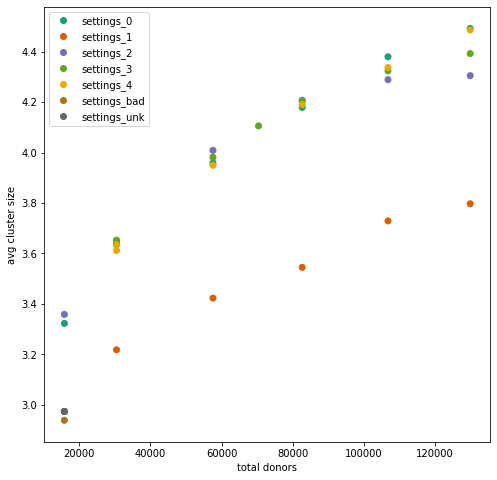

In [26]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['avg_cluster_size'].values, c=data_df['settings_num'].values, cmap='Dark2')
settings = ['settings_0','settings_1','settings_2','settings_3','settings_4','settings_bad','settings_unk']
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

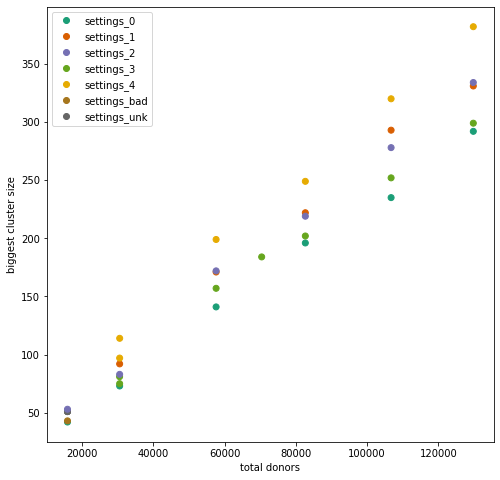

In [29]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['biggest_cluster_size'].values, c=data_df['settings_num'].values, cmap='Dark2')
settings = ['settings_0','settings_1','settings_2','settings_3','settings_4','settings_bad','settings_unk']
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

In [3]:
files = ['dedupe_extension/settings_0','dedupe_extension/settings_1',
        'dedupe_extension/settings_2','dedupe_extension/settings_3','dedupe_extension/settings_4']

In [4]:
ratio_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file])

In [5]:
ratio_sets

[[array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.45383488, 6.96108761, 6.80673584, 6.8072827 , 6.79677521]),
  'dedupe_extension/settings_0'],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.37992745, 6.67087435, 6.36784531, 6.33952963, 6.26602317]),
  'dedupe_extension/settings_1'],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.28479351, 6.93510715, 6.75279797, 6.57054044, 6.49030194]),
  'dedupe_extension/settings_2'],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.31447747, 6.89443447, 6.75555737, 6.63342033, 6.59447379]),
  'dedupe_extension/settings_3'],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.42843233, 6.95184649, 6.83205224, 6.73470032, 6.77549316]),
  'dedupe_extension/settings_4']]

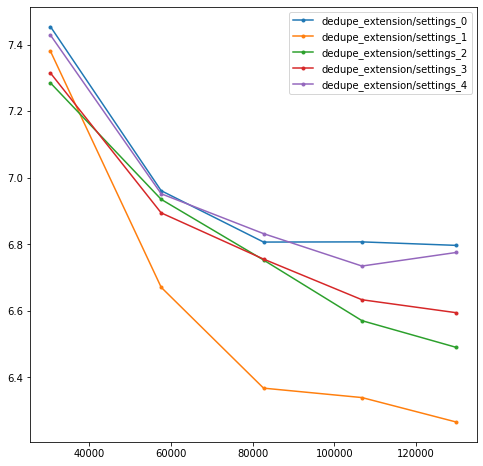

In [8]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.legend()

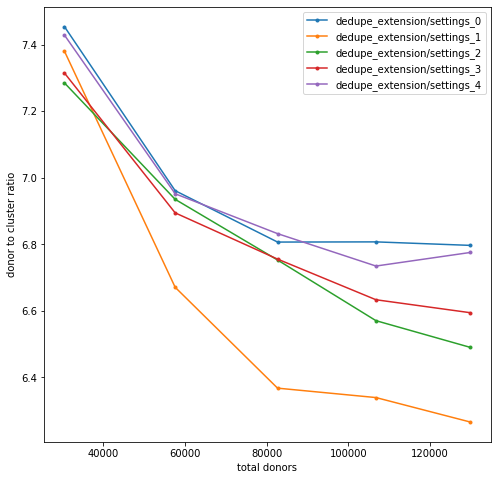

In [10]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [11]:
avg_size_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file])

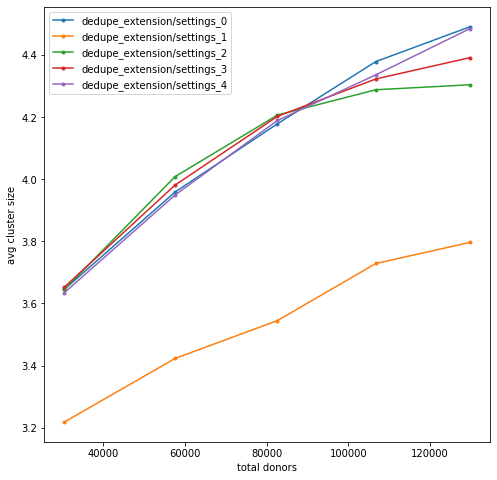

In [12]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [41]:
biggest_size_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file])

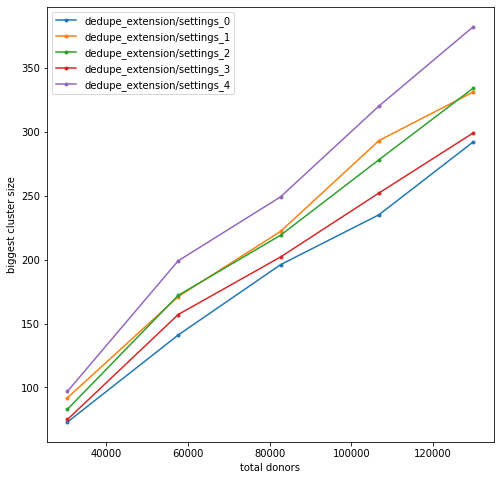

In [42]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [37]:
total_clusters_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file])

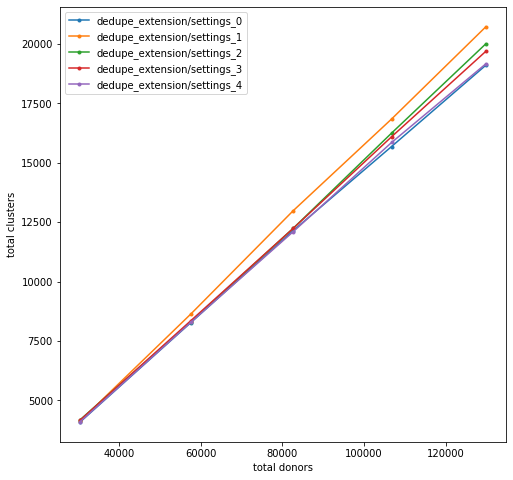

In [39]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [40]:
settings_4_clusters = pd.read_csv('settings_4_biggest_corp_cluster_sizes.csv')

In [32]:
settings_4_clusters.describe()

,cluster_size,cluster_id
count,63033.000000,63033.000000
mean,2.059746,547009.697143
std,4.430874,38085.970475
min,1.000000,483162.000000
25%,1.000000,514160.000000
50%,1.000000,546007.000000
75%,2.000000,581096.000000
max,382.000000,612993.000000


In [33]:
num_single = settings_4_clusters[settings_4_clusters['cluster_size'] == 1].shape[0]

In [34]:
percent_single = num_single/settings_4_clusters.shape[0]
percent_single

0.6960005076705853

(array([5.8709e+04, 2.6580e+03, 7.3800e+02, 3.3500e+02, 1.6600e+02,
        7.7000e+01, 7.5000e+01, 4.2000e+01, 5.6000e+01, 3.7000e+01,
        1.9000e+01, 1.9000e+01, 1.4000e+01, 1.0000e+01, 8.0000e+00,
        5.0000e+00, 6.0000e+00, 9.0000e+00, 6.0000e+00, 5.0000e+00,
        8.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00, 5.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

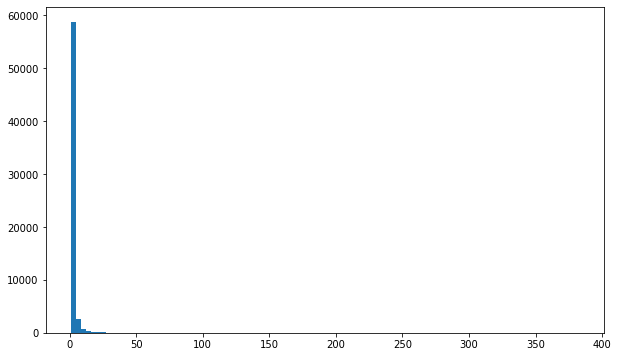

In [22]:
plt.figure(figsize=(10,6))
plt.hist(settings_4_clusters['cluster_size'].values,bins=100)

In [23]:
settings_4_non_single = settings_4_clusters[settings_4_clusters['cluster_size'] > 1]

In [24]:
settings_4_non_single.describe()

,cluster_size,cluster_id
count,19162.000000,19162.000000
mean,4.486014,546330.807797
std,7.491668,37299.335721
min,2.000000,483163.000000
25%,2.000000,514371.250000
50%,3.000000,545540.500000
75%,4.000000,579202.000000
max,382.000000,612633.000000


In [25]:
settings_4_non_single_capped = settings_4_non_single.copy()

In [26]:
settings_4_non_single_capped['cluster_size']= settings_4_non_single_capped['cluster_size'].apply(lambda x: x if x <=30 else 30 )

(array([12932.,  1906.,  1168.,   685.,   490.,   315.,   268.,   202.,
          268.,   111.,    91.,    79.,    54.,    48.,    45.,    38.,
           53.,    25.,    34.,    24.,    17.,    20.,    14.,    15.,
          260.]),
 array([ 2.  ,  3.12,  4.24,  5.36,  6.48,  7.6 ,  8.72,  9.84, 10.96,
        12.08, 13.2 , 14.32, 15.44, 16.56, 17.68, 18.8 , 19.92, 21.04,
        22.16, 23.28, 24.4 , 25.52, 26.64, 27.76, 28.88, 30.  ]),
 <a list of 25 Patch objects>)

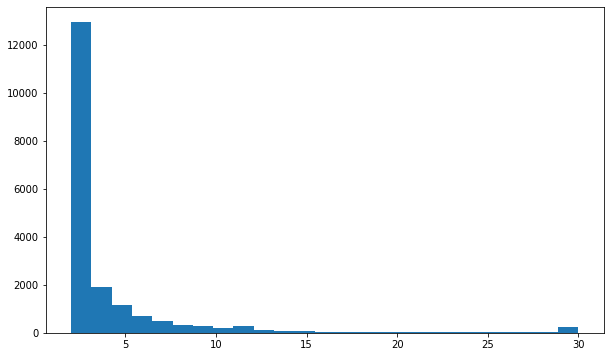

In [27]:
plt.figure(figsize=(10,6))
plt.hist(settings_4_non_single_capped['cluster_size'].values,bins=25)

In [28]:
settings_4_non_single_top = settings_4_clusters[settings_4_clusters['cluster_size'] > 30]

In [29]:
settings_4_non_single_top.describe()

,cluster_size,cluster_id
count,240.000000,240.000000
mean,53.958333,546629.962500
std,32.148426,37573.384653
min,31.000000,483190.000000
25%,35.000000,511739.750000
50%,43.000000,552151.000000
75%,63.500000,575544.750000
max,382.000000,612012.000000


(array([54., 35., 26., 20., 12., 10.,  5., 11.,  5.,  7.,  5.,  6.,  4.,
         7.,  6.,  4.,  0.,  4.,  2.,  2.,  3.,  1.,  1.,  2.,  1.,  0.,
         2.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 31.  ,  34.51,  38.02,  41.53,  45.04,  48.55,  52.06,  55.57,
         59.08,  62.59,  66.1 ,  69.61,  73.12,  76.63,  80.14,  83.65,
         87.16,  90.67,  94.18,  97.69, 101.2 , 104.71, 108.22, 111.73,
        115.24, 118.75, 122.26, 125.77, 129.28, 132.79, 136.3 , 139.81,
        143.32, 146.83, 150.34, 153.85, 157.36, 160.87, 164.38, 167.89,
        171.4 , 174.91, 178.42, 181.93, 185.44, 188.95, 192.46, 195.97,
  

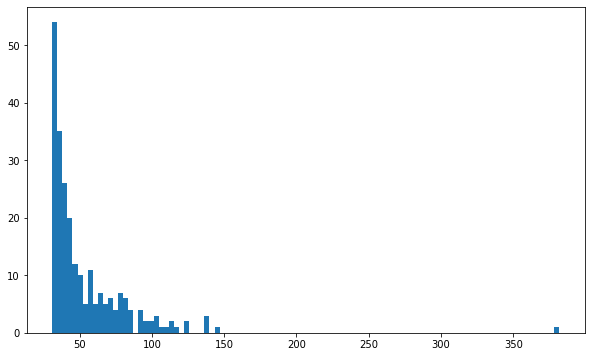

In [30]:
plt.figure(figsize=(10,6))
plt.hist(settings_4_non_single_top['cluster_size'].values,bins=100)

In [218]:
settings_4_non_single_no_unitemized = settings_4_non_single[settings_4_non_single['cluster_size'] < 382]

(array([1.2932e+04, 1.9060e+03, 1.8530e+03, 4.9000e+02, 5.8300e+02,
        2.0200e+02, 1.6000e+02, 2.1900e+02, 9.1000e+01, 1.3300e+02,
        4.8000e+01, 8.3000e+01, 3.5000e+01, 1.8000e+01, 5.9000e+01,
        2.4000e+01, 3.7000e+01, 1.4000e+01, 1.5000e+01, 2.0000e+01,
        7.0000e+00, 3.3000e+01, 1.4000e+01, 1.9000e+01, 1.3000e+01,
        3.0000e+00, 1.8000e+01, 8.0000e+00, 8.0000e+00, 6.0000e+00,
        9.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00, 3.0000e+00,
        5.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00,
        5.0000e+00, 1.0000e+00, 7.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 0.00

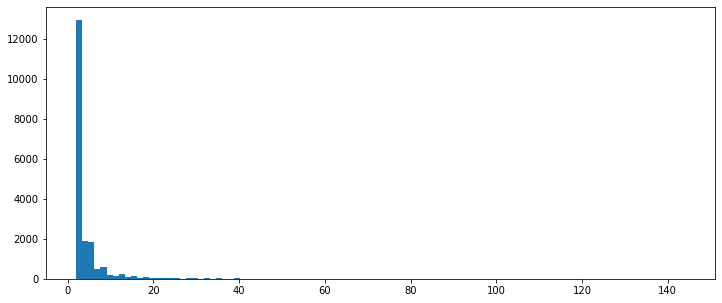

In [220]:
plt.figure(figsize=(12,5))
plt.hist(settings_4_non_single_no_unitemized['cluster_size'].values,bins=100)